# Assignment 2 - OOP and building a dataset object

Goals:
1. Understand some basic Object Oriented Programming (OOP) principles
2. Use OOP in parctice and learn to build a custom dataset


In [2]:
#load required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import cv2

## OOP part 1: basics
Object Oriented Programming is a way of writing code where bits of the code are encapsulated into particular objects or entities in our code. 
In this exercise we'll try to show why it's a useful and organized way to write code and where you might encounter it in your computer vision journey.
For example, a `numpy Array` is an object, it has a bunch of properties (called attributes) and functions (called methods) associated with it and it can be utilized repeatedly throughout your code.


In [3]:
some_array = np.array([1,2,3,4,5,6,7,8,9,10])
print(some_array)
# our array has both attributes and methods associated with it, for example:
print(some_array.shape) # this is an attribute, it returns the shape of the array
print(some_array.sum()) # this is a method, it returns the sum of the elements in the array


[ 1  2  3  4  5  6  7  8  9 10]
(10,)
55


So, this is an object that someone has already written for us, but what do we need to do if we want to write our brand new object?

We'll start with a toy example and then move on to an example relevant to Deep Learning.


In [4]:
# we start by creating a simple class called Animal
class Animal:
    # this class is a scheme for creating animal objects
    def __init__(self, species_name, num_legs, age=0):
        # the __init__ method is a special method that is called when an object is created
        # it is used to initialize the object's attributes as defined by the user when creating the object.
        # in this case our attributes are the Animal's name, the number of legs it has and the age. 
        # The age has a default value of 0, that means that if the user does not provide an age, the animal will be created with an age of 0.
        # the self parameter is a reference to the object itself, and is used to access its attributes and methods repeatadly throughout the class, 
        # to use it you must pass it as the first parameter to all class methods.
        self.name = species_name
        self.age = age
        self.number_of_legs = num_legs
        self.speed = 0 # we can also initialize attributes to default values if we want, without asking the user for them.

In [5]:
antilope = Animal('antilope', 4, 5) # this creates an Animal object with the name 'antilope', 4 legs, and age 5
print(antilope.name)
print(antilope.age)
print(antilope.number_of_legs)
print(antilope.speed)

antilope
5
4
0


we can also define methods for our class, for example:

In [6]:
class Animal:
    # this class is a scheme for creating animal objects
    def __init__(self, species_name, num_legs, age=0):
        # the __init__ method is a special method that is called when an object is created
        # it is used to initialize the object's attributes as defined by the user when creating the object.
        # in this case our attributes are the Animal's name, the number of legs it has and the age. 
        # The age has a default value of 0, that means that if the user does not provide an age, the animal will be created with an age of 0.
        # the self parameter is a reference to the object itself, and is used to access its attributes and methods repeatadly throughout the class, 
        # to use it you must pass it as the first parameter to all class methods.
        self.name = species_name
        self.age = age
        self.number_of_legs = num_legs
        self.speed = 0

    def walk(self):
         # For example, here we want to set the Animal's to 1 when it walks, so we call self.speed to access the speed attribute of that same object
        self.speed = 1
        print(f"Walking! changed speed to {self.speed}")

    def birthday(self):
       # We can also use methods to increment an existing attribute of the object
        self.age += 1  # this increments the age attribute by 1
        print(f"{self.name} is now {self.age} years old")

In [7]:
antilope = Animal('antilope', 5, 4)
print("Antilope speed is: ", antilope.speed)
antilope.walk()
print("Antilope speed is now: ", antilope.speed)
print("Antilope age is: ", antilope.age)
antilope.birthday()
print("Antilope age is now: ", antilope.age)
# I can also directly set the attributes of the object
antilope.age = 10
print("Antilope age is now: ", antilope.age)


Antilope speed is:  0
Walking! changed speed to 1
Antilope speed is now:  1
Antilope age is:  4
antilope is now 5 years old
Antilope age is now:  5
Antilope age is now:  10


Now it's your turn, edit the code chunk below with the following changes:
1. Add an attribute called `is_asleep` and initizalize it as `False` 
2. Add method called `run` which changes the `Animal`'s speed to 2 and prints a notice to the user. 
3. Add a method called `sleep` which change the `is_asleep` attribute to `True`
4. Create a new `Animal` called "spider" that has 8 legs and is 2 years old.


In [8]:

class Animal:
    def __init__(self, species_name, num_legs, age=0):
        self.name = species_name
        self.age = age
        self.number_of_legs = num_legs
        self.speed = 0
        ################## Your code here ##################

    def walk(self):
        self.speed = 1
        print(f"Walking! changed speed to {self.speed}")

    def run(self):
        pass 
        ################## Your code here ##################
    def sleep(self):
        pass
        ################## Your code here ##################
        
    def birthday(self):
        self.age += 1  
        print(f"{self.name} is now {self.age} years old")

## OOP part 2: Inheritance
In some cases, we might have a sub-group of object that all share the same properties. 
For example, all ungulates share some attributes (e.g., all have four legs). <br>
Now we can define a completely new object called Ungulate, and re-define all of the methods we had in the Animal class, but this way if we want to change or add something for all animals down the line, we'd have to remember to edit our code in the two classes and this is just asking too much from our future selves.
Instead, we can use something called inheritance to create a new class that inherits its attributes and methods from the animal class.
Let's see how this syntax works.

In [9]:
# create a new class called Ungulate that inherits from the Animal class by using the syntax NewClassName(ParentClassName)
class Ungulate(Animal):
    def __init__(self, species_name, age):
        # notice that the init of this class only takes a name and an age but not number of legs because we know that all Quadrapedes have 4 legs
        super().__init__(species_name, num_legs=4, age=age) # this calls the init of the parent class and passes the name and age to it, and sets the number of legs to 4


This bit of code is actually all we need to define the new class, but behind the scenes we're using all the hard work we did before on the parent class Animal. 
Let's create a new Quadrapede and see this at work:

In [10]:
dikdik = Ungulate('Dik-dik', 3)
print('this', dikdik.name, 'has', dikdik.number_of_legs,'legs and is', dikdik.age, 'years old')
# our Dik-dik object has all the methods of the Animal class, so it can walk and have birthdays
dikdik.walk()
dikdik.birthday()

this Dik-dik has 4 legs and is 3 years old
Walking! changed speed to 1
Dik-dik is now 4 years old


We can add new attributes and methods to this class that are unique to Quadrapedes: 

In [11]:
# create a new class called Ungulate that inherits from the Animal class by using the syntax NewClassName(ParentClassName)
class Ungulate(Animal):
    def __init__(self, species_name, is_even_toed, age=0):
        # notice that the init of this class only takes a name and an age but not number of legs because we know that all Quadrapedes have 4 legs
        super().__init__(species_name, num_legs=4, age=age) # this calls the init of the parent class and passes the name and age to it, and sets the number of legs to 4
        self.horn_length = 0
        self.even_toed = is_even_toed # user specifies if the ungulate is even toed or not
    
    def grow_horn(self):
        self.horn_length += 1
        
    

In [12]:
gazelle = Ungulate('Gazelle', is_even_toed=True, age=2)
print(gazelle.horn_length)
gazelle.grow_horn() # we can use this class specific method to grow the horn of the gazelle, if we were to define gazelle as Animal, we would not have this method
print(gazelle.horn_length)

0
1


### It's your turn!
1. Create a new class called [Decapod](https://en.wikipedia.org/wiki/Decapod), which inherits from the Animal class. 
2. All decapods have ten legs and are capable of molting their skeleton, include these assumptions in the design of your class (e.g., in initialization and in method design)

In [13]:
########### Your code here ##############

## OOP in practice - building a dataset object

In the context of Deep Learning, a lot of the codebases we'll use will be based on object oriented programming. <br>
For example, a model would be an object (and actually all of its sub-components as well), a dataset and a data loader would be also objects, and sometimes a model trainer would be another object. <br>

We won't deal with models right now, but we will see how to build a custom dataset object that can load the images and annotations. <br>
We'll use the toy data from the previous assignment `randalls_fish`, each image in the folder has an associated `.csv` file with the same name that contains landmarks of interest on each fish. 
As a start, let's create a dataset object that, given a folder path, the object will create two lists `image_paths`  and `annoation_paths`.



In [14]:
class FishDataset:
    def __init__(self, dataset_path):
        files = os.listdir(dataset_path) # bonus question: what happens to the files variable after this method ends? can we access it from outside the method?
        self.image_files = [f for f in files if f.endswith('.jpg')]
        # We want to get the annotations as well, but we want them to be in the same order as the images, so we will explicitly replace the image extension with the annotation extension 
        # the downside of this is that it assumes the annotation file exists, we'll deal with this later
        self.annotation_files = [f.replace('.jpg', '.csv') for f in self.image_files]
        self.dataset_path = dataset_path
    

In [15]:
randall = FishDataset('./randalls_fish/')
print(randall.image_files)
print(randall.annotation_files)

['Cephalopholis aurantia_Ceaur_u3.jpg', 'female_Halichoeres claudia_Haorn_u2.jpg', 'Oxycheilinus bimaculatus_Oxbim_u7.jpg', 'Cirrhilabrus punctatus_Cipun_u4.jpg', 'juvenile_Amphiprion chrysopterus_Amchr_j0.jpg', 'female_Halichoeres hartzfeldii_Hahar_f1.jpg', 'Gymnothorax margaritophorus_Gymar_u4.jpg', 'Oxycheilinus digramma_Oxdig_u4.jpg', 'female_Genicanthus watanabei_Gewat_f1.jpg', 'Epinephelus ongus_Epong_u2.jpg']
['Cephalopholis aurantia_Ceaur_u3.csv', 'female_Halichoeres claudia_Haorn_u2.csv', 'Oxycheilinus bimaculatus_Oxbim_u7.csv', 'Cirrhilabrus punctatus_Cipun_u4.csv', 'juvenile_Amphiprion chrysopterus_Amchr_j0.csv', 'female_Halichoeres hartzfeldii_Hahar_f1.csv', 'Gymnothorax margaritophorus_Gymar_u4.csv', 'Oxycheilinus digramma_Oxdig_u4.csv', 'female_Genicanthus watanabei_Gewat_f1.csv', 'Epinephelus ongus_Epong_u2.csv']


Two useful methods when dealing with datasets (or any iterable object) are the `__len__` and `__getitem__` methods. <br>
These are special methods that allow us to call `len(dataset)` and `dataset[i]`, respectively,  like we would for any array/list (the first returns the number of elements, the second retrieves an object in the i-th place).

We'll start by implementing the `__getitem__` method. 
This method get an index from the user and returns...? Well whatever we'd like really, but most basically - the image and the associated label/annotation in an easy to use format. You could also choose to return any metadata you deem important.


In [16]:
class FishDataset:
    def __init__(self, dataset_path):
        files = os.listdir(dataset_path) # bonus question: what happens to the files variable after this method ends? can we access it from outside the method?
        self.image_files = [f for f in files if f.endswith('.jpg')]
        # We want to get the annotations as well, but we want them to be in the same order as the images, so we will explicitly replace the image extension with the annotation extension 
        # the downside of this is that it assumes the annotation file exists, we'll deal with this later
        self.annotation_files = [f.replace('.jpg', '.csv') for f in self.image_files]
        self.dataset_path = dataset_path

    @staticmethod
    def filter_annotation(annotation):
        # the csv file is a file automatically generated by the annotation tool, 
        # it contains the aside from X Y coordinates other columns that are not of interest.
        # we want to take only the X and Y columns and return them as a numpy array
        # note that this method does not need the self parameter because it does not access any object attributes, 
        # this type of method is called a static method, this why we use the decorator @staticmethod above the method.
        return annotation[['X', 'Y']].values
    
    def __getitem__(self, idx):
        # we want to return the image and the annotation file for a given index
        # read and process the image:
        image = cv2.imread(os.path.join(self.dataset_path, self.image_files[idx]))
        image_rgb = image[:,:,::-1] # opencv reads images in BGR format, we want to convert it to RGB (see previous assignment)
        # read and process the annotation
        annotation = pd.read_csv(os.path.join(self.dataset_path, self.annotation_files[idx]))
        annotation = self.filter_annotation(annotation) # make the annotation a numpy array with only the cartesian coordinates for the landmarks
        return image_rgb, annotation

In [17]:
randall = FishDataset('./randalls_fish/')
image, annotation = randall[3]

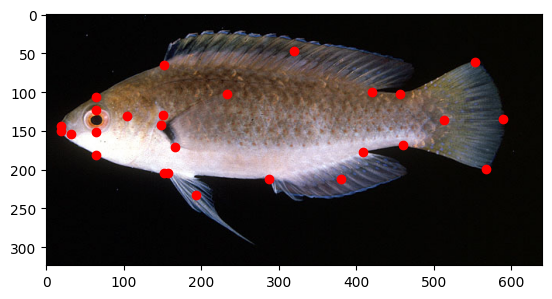

In [18]:
# let's visualize our sample:
plt.imshow(image)
plt.scatter(annotation[:,0], annotation[:,1], c='r')

Hm, that's actually a useful bit of code. You might want to include it as a method for the dataset object!
Here's how you could go about it:

In [20]:
class FishDataset:
    def __init__(self, dataset_path):
        files = os.listdir(dataset_path) # bonus question: what happens to the files variable after this method ends? can we access it from outside the method?
        self.image_files = [f for f in files if f.endswith('.jpg')]
        # We want to get the annotations as well, but we want them to be in the same order as the images, so we will explicitly replace the image extension with the annotation extension 
        # the downside of this is that it assumes the annotation file exists, we'll deal with this later
        self.annotation_files = [f.replace('.jpg', '.csv') for f in self.image_files]
        self.dataset_path = dataset_path

    @staticmethod
    def filter_annotation(annotation):
        # the csv file is a file automatically generated by the annotation tool, 
        # it contains the aside from X Y coordinates other columns that are not of interest.
        # we want to take only the X and Y columns and return them as a numpy array
        # note that this method does not need the self parameter because it does not access any object attributes, 
        # this type of method is called a static method, this why we use the decorator @staticmethod above the method.
        return annotation[['X', 'Y']].values
    
    def __getitem__(self, idx):
        # we want to return the image and the annotation file for a given index
        # read and process the image:
        image = cv2.imread(os.path.join(self.dataset_path, self.image_files[idx]))
        image_rgb = image[:,:,::-1] # opencv reads images in BGR format, we want to convert it to RGB (see previous assignment)
        # read and process the annotation
        annotation = pd.read_csv(os.path.join(self.dataset_path, self.annotation_files[idx]))
        annotation = self.filter_annotation(annotation) # make the annotation a numpy array with only the cartesian coordinates for the landmarks
        return image_rgb, annotation
    
    def visualize_sample(self, idx):
        image, annotation = self[idx] # we just use our already written __getitem__ method to get the image and annotation
        plt.imshow(image)
        plt.scatter(annotation[:,0], annotation[:,1], c='r')
        plt.show()  # this is necessary because the plot is not shown until plt.show() is called

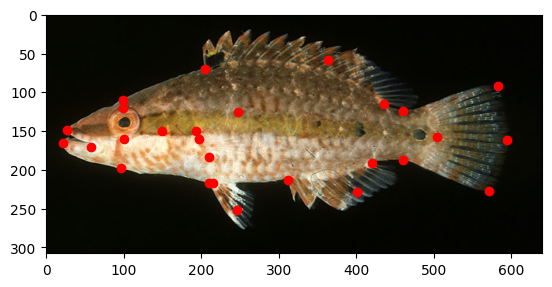

In [24]:
randall = FishDataset('./randalls_fish/')
randall.visualize_sample(7)

### Now it's your turn! 
Implement the `__len__` method in the code chunk below. 
Hint: what attribute can give you the number of items/images in the dataset?

In [ ]:
class FishDataset:
    def __init__(self, dataset_path):
        files = os.listdir(dataset_path) # bonus question: what happens to the files variable after this method ends? can we access it from outside the method?
        self.image_files = [f for f in files if f.endswith('.jpg')]
        # We want to get the annotations as well, but we want them to be in the same order as the images, so we will explicitly replace the image extension with the annotation extension 
        # the downside of this is that it assumes the annotation file exists, we'll deal with this later
        self.annotation_files = [f.replace('.jpg', '.csv') for f in self.image_files]
        self.dataset_path = dataset_path

    @staticmethod
    def filter_annotation(annotation):
        # the csv file is a file automatically generated by the annotation tool, 
        # it contains the aside from X Y coordinates other columns that are not of interest.
        # we want to take only the X and Y columns and return them as a numpy array
        # note that this method does not need the self parameter because it does not access any object attributes, 
        # this type of method is called a static method, this why we use the decorator @staticmethod above the method.
        return annotation[['X', 'Y']].values
    
    def __getitem__(self, idx):
        # we want to return the image and the annotation file for a given index
        # read and process the image:
        image = cv2.imread(os.path.join(self.dataset_path, self.image_files[idx]))
        image_rgb = image[:,:,::-1] # opencv reads images in BGR format, we want to convert it to RGB (see previous assignment)
        # read and process the annotation
        annotation = pd.read_csv(os.path.join(self.dataset_path, self.annotation_files[idx]))
        annotation = self.filter_annotation(annotation) # make the annotation a numpy array with only the cartesian coordinates for the landmarks
        return image_rgb, annotation
    
    def visualize_sample(self, idx):
        image, annotation = self[idx] # we just use our already written __getitem__ method to get the image and annotation
        plt.imshow(image)
        plt.scatter(annotation[:,0], annotation[:,1], c='r')
        plt.show()  # this is necessary because the plot is not shown until plt.show() is called
        
    def __len__(self):
        ########### your code here ##############
        pass



In [ ]:
# when you're done you can run this chunck and see if it works:
randall = FishDataset('./randalls_fish/')
len(randall) #this should print the number of images in the dataset

## Final exercise:
Build a dataset object for your own data! Make sure to implement the `__getitem__` and `__len__` methods. Note that there are many different folder structures and annotation styles, if you're unsure about how to organize your data, come to Python Office Hours and chat with us about it :)

### Recommended extra reading:
The tutorial below extends the basic dataset and shows how to add image transformations like we so in the previous assignment (a.k.a transforms in PyTorch lingo) to your data and use a PyTorch data loader to load batches of images:
https://pytorch.org/tutorials/beginner/data_loading_tutorial.html


### Data source
The images used here are part of a really awesome collection gathered by the legendary Ichtyologist [John E. Randall](https://jerlegacy.com/) and maintained in the [Bishop Museum in Hawaii](http://pbs.bishopmuseum.org/images/JER/) and the [FishBase database](https://www.fishbase.se/photos/PhotosList.php?id=50&vCollaborator=John+E.+Randall). 